In [33]:
import sys
import os
import importlib

parent = os.path.dirname(os.getcwd())
sys.path.insert(0, parent)

from Helpers import loadData
importlib.reload(sys.modules['Helpers.chunker'])
importlib.reload(sys.modules['Helpers'])

import matplotlib.pyplot as plt
import sklearn
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
import numpy as np
import cv2

In [10]:
# Load downscaled data
folderData = os.path.join(os.path.dirname(parent),'Data')
data = loadData(location=folderData, fileName='downscale_17.hdf5')

<class 'numpy.float64'>


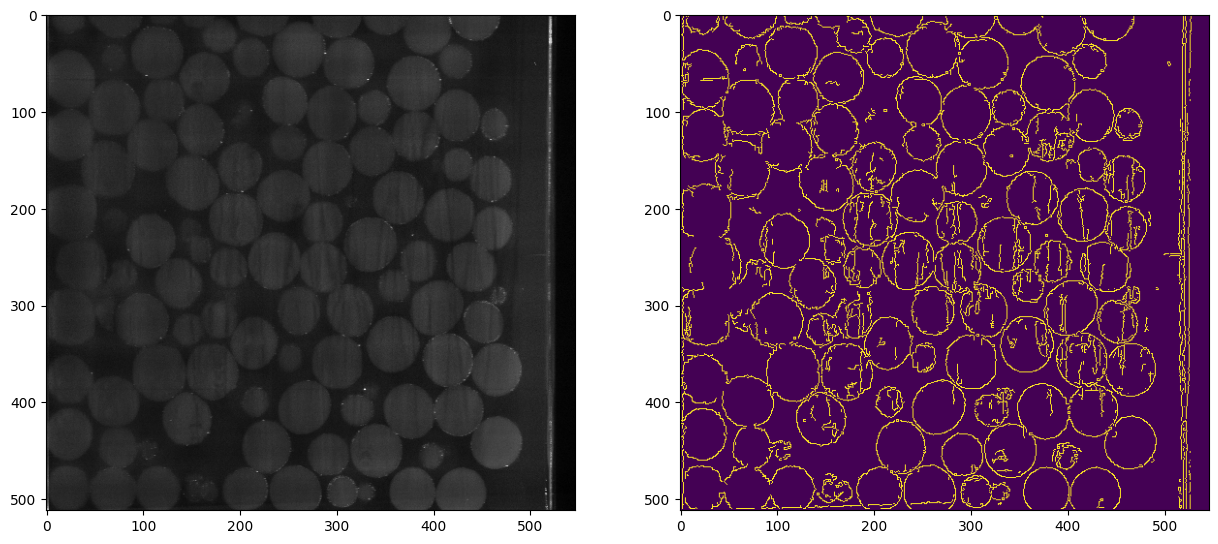

In [54]:
img = data[120,:,:]
img = sklearn.preprocessing.normalize(img)
img = img * 7
print(type(img[0,0]))

eImg1 = canny(img, sigma=.5)

fig,axs = plt.subplots(1,2)
axs[0].imshow(img,cmap='grey')
axs[1].imshow(eImg1)
fig.set_size_inches(15,10)

In [ ]:
image = np.zeros((200, 200), dtype=np.uint8)
rr, cc = circle_perimeter(100, 100, 50)
image[rr, cc] = 255

try_radii = np.arange(5, 60)
accumulator = hough_circle(image, try_radii)
accum, cx, cy, rad = hough_circle_peaks(accumulator, try_radii, total_num_peaks=1)   

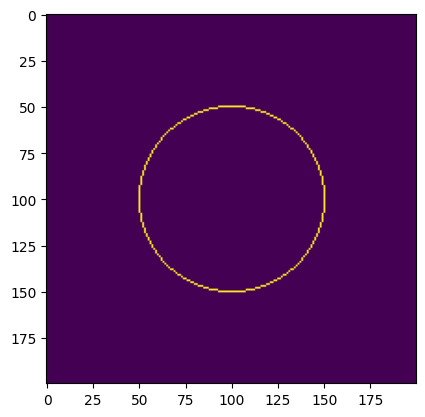

In [4]:
plt.imshow(image)

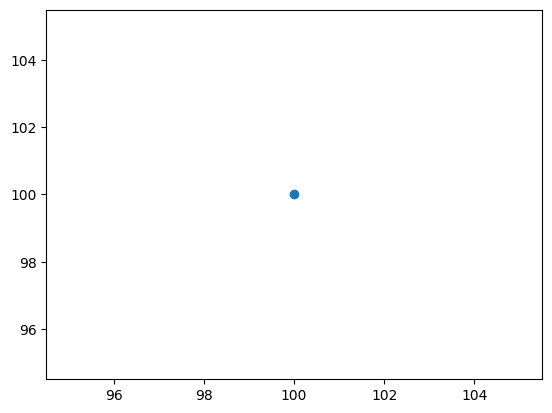

In [3]:
import matplotlib.pyplot as plt
plt.scatter(cx,cy)

In [1]:
print('meow')

meow


In [ ]:

img = cv2.imread('image.png', 0)
blurred = cv2.GaussianBlur(img, (9, 9), 2)
circles = cv2.HoughCircles(blurred, cv2.HOUGH_GRADIENT, dp=1, minDist=20,
                           param1=50, param2=30, minRadius=0, maxRadius=0)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(img, (i[0], i[1]), i[2], (0, 255, 0), 2)
        cv2.circle(img, (i[0], i[1]), 2, (0, 0, 255), 3)   